## 0. setup device-agnostic code

In [1]:
import torch 
from torch import nn 

torch.__version__

'2.4.0'

In [2]:
# setup device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get data

The dataset is a subset of the Food101 dataset. Food101 starts with 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

**note**: when starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

check-out full article - https://www.learnpytorch.io/04_pytorch_custom_datasets/

In [3]:
import requests 
import zipfile 
from pathlib import Path 

# setup path to a data folder 
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print("folder already exists")
else:
    print("downloading...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f: 
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)

folder already exists


In [4]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [5]:
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref: 
    print("unzipping pizza, steak, and sushi data...")
    zip_ref.extractall(image_path)

unzipping pizza, steak, and sushi data...


## 2. Data preparation and data exploration

In [6]:
import os 

def walk_through_dir(dir_path):
    """walks through directory and returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [7]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data\pizza_steak_sushi
there are 3 directories and 0 images in data\pizza_steak_sushi\test
there are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
there are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
there are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
there are 3 directories and 0 images in data\pizza_steak_sushi\train
there are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
there are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
there are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [8]:
# setup training and testing paths
training_dir = image_path / "train"
testing_dir = image_path / "test"

training_dir, testing_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 visualizing image

1. get all of the image paths
2. pick a random image path using Python's random.choice()
3. get the image class name using `pathlib.Path.parent.stem`
4. open image with Python PIL 
5. show the image and print metadata

In [9]:
import random 
from PIL import Image

# 1. get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

random image path: data\pizza_steak_sushi\train\steak\3727491.jpg
image class: steak
image height: 512
image width: 512


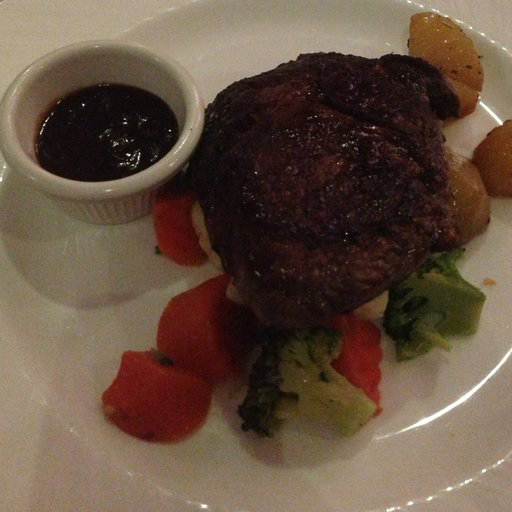

In [10]:
# 2. pick a random image path
random_image_path = random.choice(image_path_list)

# 3. get image class from path name (image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # will be the class label

# 4. open image
img = Image.open(random_image_path)

# 5. print metada 
print(f"random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

### 2.2 visualizing image with matplotlib

In [11]:
import numpy as np

# turn image into numpy array
img_as_array = np.asarray(Image.open(random_image_path))
img_as_array

array([[[134, 119,  96],
        [135, 120,  97],
        [143, 128, 105],
        ...,
        [167, 152, 133],
        [170, 155, 136],
        [174, 159, 140]],

       [[144, 129, 106],
        [158, 143, 120],
        [176, 161, 138],
        ...,
        [170, 155, 136],
        [170, 155, 136],
        [170, 155, 136]],

       [[186, 172, 146],
        [183, 168, 145],
        [182, 167, 144],
        ...,
        [173, 158, 139],
        [171, 156, 137],
        [165, 150, 131]],

       ...,

       [[155, 129, 112],
        [156, 130, 113],
        [158, 132, 115],
        ...,
        [150, 133, 115],
        [151, 134, 116],
        [154, 137, 119]],

       [[161, 135, 118],
        [158, 132, 115],
        [158, 132, 115],
        ...,
        [151, 134, 116],
        [153, 136, 118],
        [153, 136, 118]],

       [[158, 132, 115],
        [153, 127, 110],
        [152, 126, 109],
        ...,
        [153, 136, 118],
        [156, 139, 121],
        [155, 138, 120]]

Text(0.5, 1.0, 'label: steak | shape: (512, 512, 3) (H,W,C)')

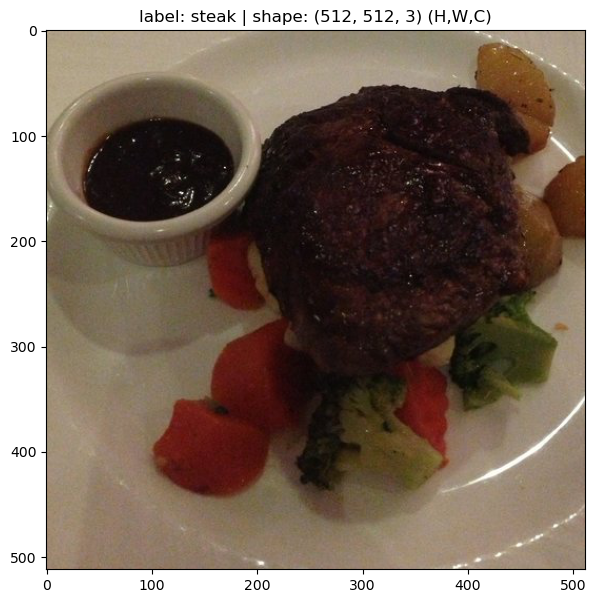

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"label: {image_class} | shape: {img_as_array.shape} (H,W,C)")

## 3. Transforming data

Before we can use our image data with Pytorch: 
1. Turn your target data into tensors (in this case is turning image data into tensors/numerical representation)
2. Turn it into a `torch.utils.data.Dataset` + transforming with ToTensor()
3. Subsequently turn the data into `torch.utils.data.DataLoader` (batch version of the datasets)

In [13]:
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [14]:
# write a transform for image 
data_transform = transforms.Compose([
    # resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5),
    # turn the image into torch.Tensor 
    # convert PIL image or ndarray (H,W,C) to torch.Tensor with shape (C,H,W)
    transforms.ToTensor()
])

In [15]:
sample = data_transform(img) # the argument expects PIL image
sample

tensor([[[0.6706, 0.6667, 0.6667,  ..., 0.6902, 0.6824, 0.6824],
         [0.6706, 0.6706, 0.6745,  ..., 0.6863, 0.6863, 0.6824],
         [0.6784, 0.6784, 0.6824,  ..., 0.6941, 0.6941, 0.6941],
         ...,
         [0.6196, 0.6078, 0.6039,  ..., 0.6235, 0.6275, 0.6196],
         [0.6078, 0.6078, 0.6000,  ..., 0.6196, 0.6196, 0.6196],
         [0.6039, 0.6039, 0.6039,  ..., 0.6157, 0.6157, 0.6118]],

        [[0.6118, 0.6078, 0.6078,  ..., 0.6275, 0.6275, 0.6235],
         [0.6118, 0.6118, 0.6157,  ..., 0.6275, 0.6353, 0.6314],
         [0.6196, 0.6196, 0.6235,  ..., 0.6392, 0.6392, 0.6392],
         ...,
         [0.5412, 0.5373, 0.5333,  ..., 0.5373, 0.5373, 0.5333],
         [0.5412, 0.5333, 0.5255,  ..., 0.5294, 0.5333, 0.5294],
         [0.5333, 0.5255, 0.5255,  ..., 0.5294, 0.5294, 0.5216]],

        [[0.5333, 0.5255, 0.5333,  ..., 0.5294, 0.5294, 0.5255],
         [0.5333, 0.5412, 0.5373,  ..., 0.5176, 0.5137, 0.5216],
         [0.5451, 0.5451, 0.5294,  ..., 0.5294, 0.5255, 0.

In [16]:
sample.shape # (C, H, W)

torch.Size([3, 64, 64])

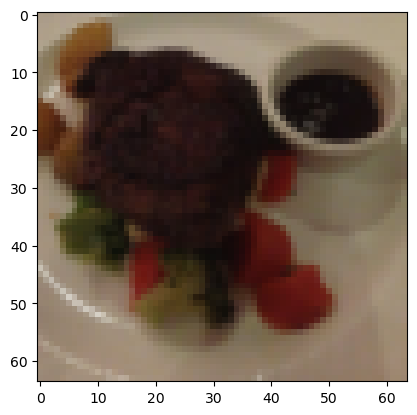

In [17]:
# matplotlib expects image with format shape of (H, W, C) so the tensor should 
# be permuted to follow this form
plt.imshow(torch.permute(sample, (1, 2, 0)))

In [18]:
image_path_list[10]

WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg')

In [19]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images from a path of images and loads/transforms them then plots
    the original vs the transformed version
    """
    torch.manual_seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            # original image
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            
            # transformed_image
            transformed_image = transform(f).permute(1, 2, 0) # (C,H,W) -> (H,W,C)
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Tranformed\nSize: {transformed_image.shape}")

            fig.suptitle(f"Class: {image_path.parent.stem}")

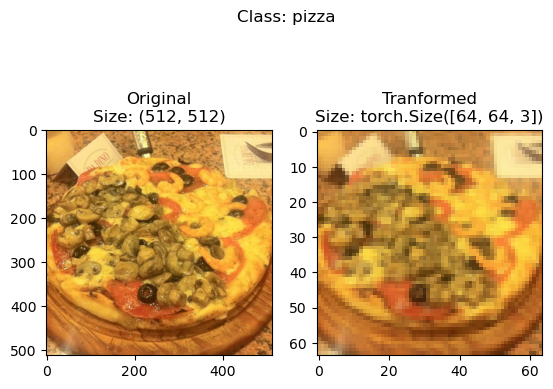

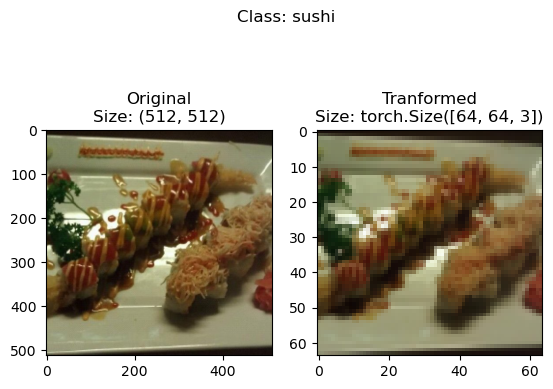

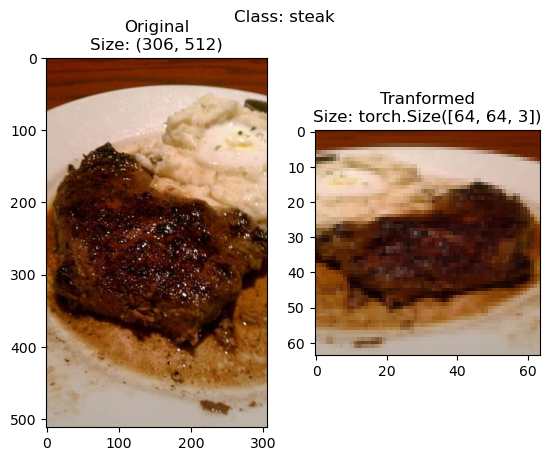

In [20]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform)

## 4. Option 1: Loading image data using `ImageFolder`

docs - https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

In [21]:
training_dir, testing_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [22]:
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [23]:
# use ImageFolder to create datasets 
from torchvision import datasets
training_data = datasets.ImageFolder(root=training_dir, 
                                    transform=train_transform, # transform the data
                                    target_transform=None) # transform the label (in this case we don't need this because the label is the parent.stem of the image)

testing_data = datasets.ImageFolder(root=testing_dir,
                                    transform=test_transform)

training_data, testing_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [24]:
# get class names as a list 
class_names = training_data.classes
class_names

['pizza', 'steak', 'sushi']

In [25]:
# check the length of the datasets 
len(training_data), len(testing_data)

(225, 75)

In [26]:
training_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [27]:
# index on the train_data dataset to get a single image and label 
# img, label = training_data[0]
img, label = training_data[0][0], training_data[0][1]
print(f"Image tensor: {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")

Image tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

original shape: torch.Size([3, 64, 64])
permuted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

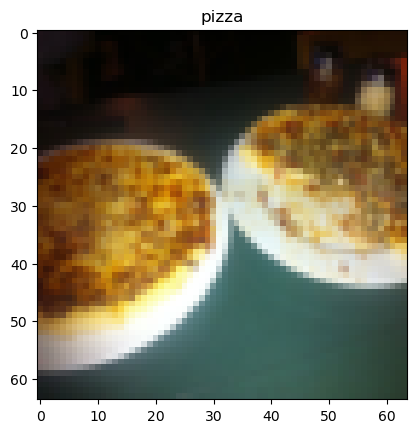

In [28]:
# rearrange the order dimension 
img_permuted = img.permute(1, 2, 0) # (H,W,C)

# print out different shapes 
print(f"original shape: {img.shape}")
print(f"permuted shape: {img_permuted.shape}")

# plot the image
plt.imshow(img_permuted)
plt.title(class_names[label])

## 4. Option 2: Using custom ImageLoader

1. To be able to load images from file
2. To be able to get class names from the dataset
3. To be able to get classes as dictionary from the dataset

In [29]:
import os # for python file system
import pathlib 

from PIL import Image 
from torch.utils.data import Dataset 
from torchvision import transforms 
from typing import Tuple, Dict, List 

In [30]:
# instance of torchvision.datasets.ImageFolder()
training_data.classes, training_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 4.1 creating a helper function to get class names 

1. Get the class names using `os.scandir()` to traverse a target directory
2. Raise an error if the class names aren't found
3. Turn the class names into a dict and a list and return them

In [31]:
# setup path for target directory 
target_directory = training_dir
print(f"target dir: {target_directory}")

# get the class names from the target directory 
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [32]:
def find_classes(directory: str) -> Tuple[list[str], Dict[str, int]]:
    """
    Finds the class folder names in a target directory 
    """
    # 1. get the class names by scanning the target directory 
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. raise an error is class names couldn't be found 
    if not classes:
        raise FileNotFoundError(f"couldn't find any classes in {directory}")
    
    # 3. create a dictionary of index labels 
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [33]:
find_classes(directory=target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 4.2 create a custom `Dataset` to replicate `ImageFolder`

source - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

1. subclass `torch.utils.data.Dataset`
2. init out subclass with a traget directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data 
3. create several attributes: 
    * paths - paths of our images 
    * transform - the transform we'd like to use 
    * classes - a list of the target classes 
    * class_to_idx - a dict of the target classes mapped to integer labels
4. create a function load images `load_images()`
5. overwrite the `__len__()` method to return the length of our dataset
6. overwrite the `__getitem__()` method to return a given sample when passed an index

In [34]:
# write a custom dataset class 
from torch.utils.data import Dataset 

# 1. subclass torch.utils.data.Dataset 
class ImageFolderCustom(Dataset):
    # 2. initialize the constructor
    def __init__(self, targ_dir: str, transform=None):
        # 3. create several attributes 
        # get all the image paths 
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # setup transforms
        self.transform = transform
        # create classes and class_to_idx 
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. create a function to load images 
    def load_image(self, index: int) -> Image.Image: 
        "opens an image via a path and returns it"
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. overwrite __len__()
    def __len__(self) -> int: 
        return len(self.paths)
    
    # 6. overwrite __getitem__() to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "returns one sample of data, data and the label (X, y)"
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # transform if necessary 
        if self.transform:
            return self.transform(img), class_idx
        else: 
            return img, class_idx

In [35]:
# create a transform 
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [36]:
# test out ImageFolderCustom()
train_data_custom = ImageFolderCustom(targ_dir=training_dir, 
                                        transform=train_transform)

test_data_custom = ImageFolderCustom(targ_dir=testing_dir, 
                                        transform=test_transform)

In [37]:
len(train_data_custom), len(training_data)

(225, 225)

In [38]:
len(test_data_custom), len(testing_data)

(75, 75)

In [39]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

### 4.3 create a function to display random images

1. take in a `Dataset` and a number of other parameters such as class names and how many images to visualize 
2. determine the number of images
3. set the random seed for reproducibility
4. get a list of random sample indices from the target dataset 
5. setup a matplotlib plot
6. loop through the random sample images and plot them with matplotlib 
7. make sure the dimensions of our images line up with matplotlib format (HWC)

In [40]:
def display_random_images(dataset: torch.utils.data.Dataset, 
                            classes: List[str] = None, 
                            n: int = 10, 
                            display_shape: bool = True, 
                            seed: int = None):
    if n > 10: 
        n = 10 
        display_shape = False
    
    if seed: 
        random.seed(seed)

    plt.figure(figsize=(16, 8 * (n//5)))
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample]
        targ_img_permuted = targ_image.permute(1, 2, 0)

        plt.subplot(i//5 + 1, n//2, i+1)
        plt.imshow(targ_img_permuted)
        if classes: 
            title = f"class: {classes[targ_label]}"
            if display_shape: 
                title = title + f"\nShape: {targ_img_permuted.shape}"
            plt.title(title)

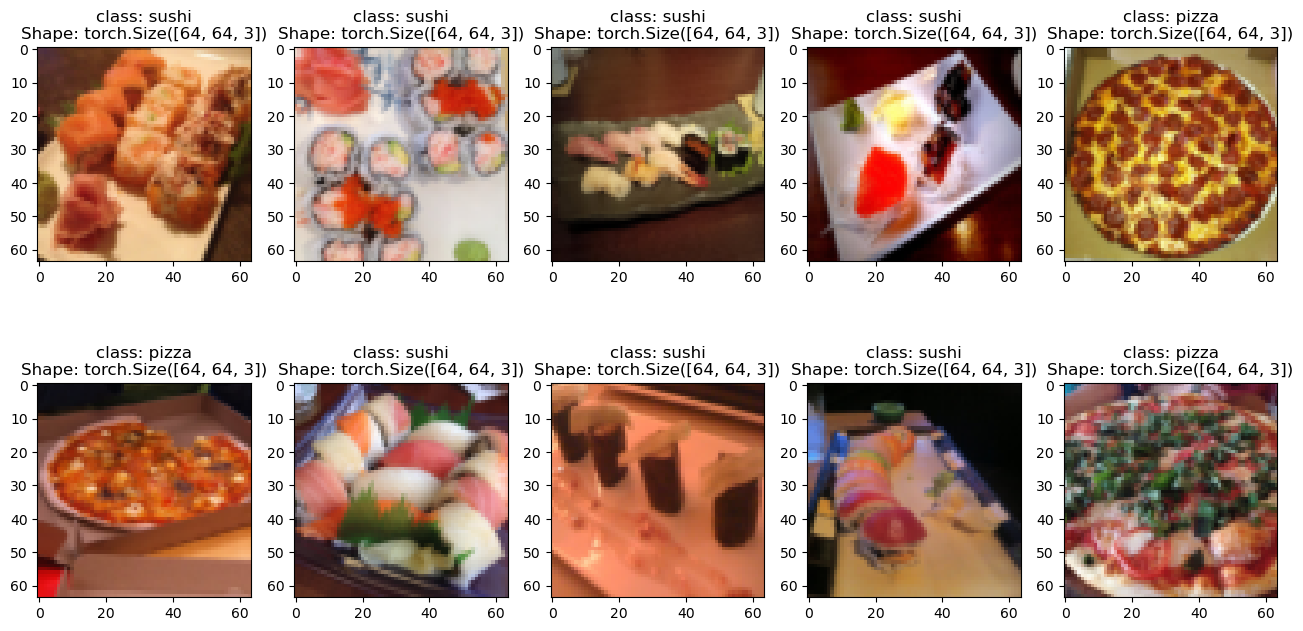

In [41]:
display_random_images(dataset=training_data, 
                        classes=training_data.classes, 
                        n=10,
                        seed=20)

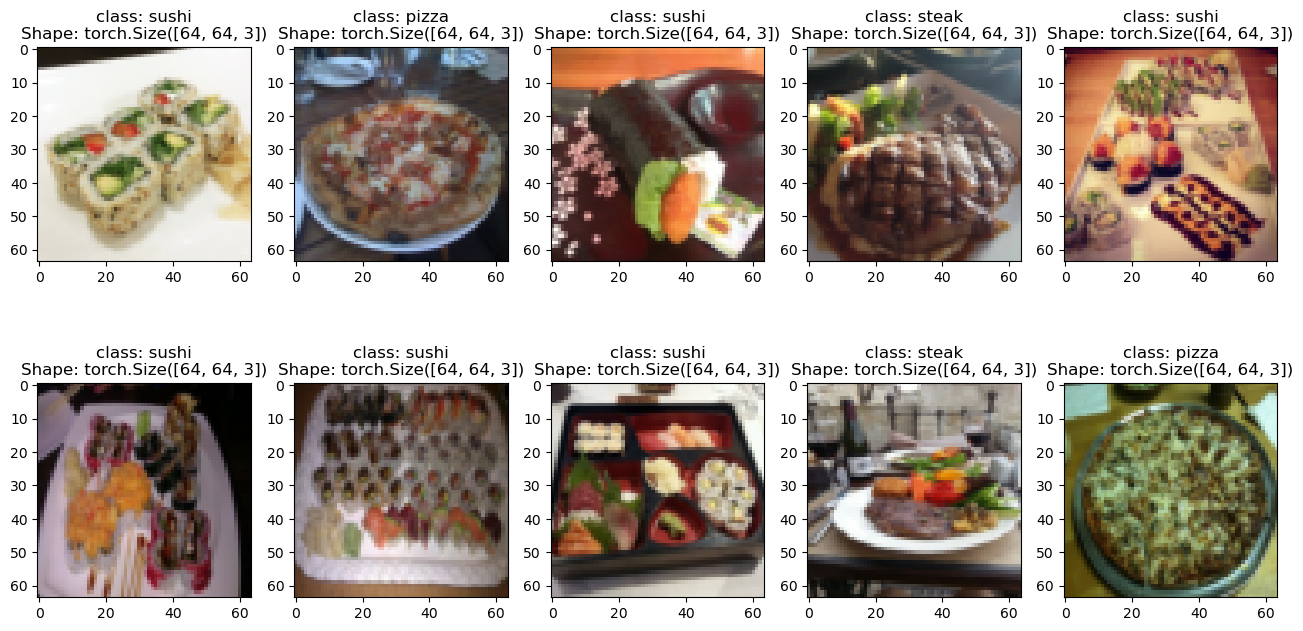

In [42]:
display_random_images(dataset=train_data_custom, 
                        classes=train_data_custom.classes, 
                        n=10,
                        seed=5)

## 5. setup dataloader (batch)

A `DataLoader` is used to turn our `Dataset` innto iterables (group of mini-batches) and we can customize the `BATCH_SIZE` so our model can see multiple images at a time (batch).

In [43]:
import os 
os.cpu_count()

16

In [44]:
BATCH_SIZE = 32

training_dataloader = DataLoader(dataset=training_data, 
                                batch_size=BATCH_SIZE, 
                                shuffle=True)

testing_dataloader = DataLoader(dataset=testing_data,
                                batch_size=BATCH_SIZE, 
                                shuffle=False)

In [45]:
a, b = next(iter(training_dataloader))
a.shape # [batch_size, color_channels, height, width]

torch.Size([32, 3, 64, 64])

## 6. data augmentation

data augmentation is the process of artificially adding diversity to the training data. 

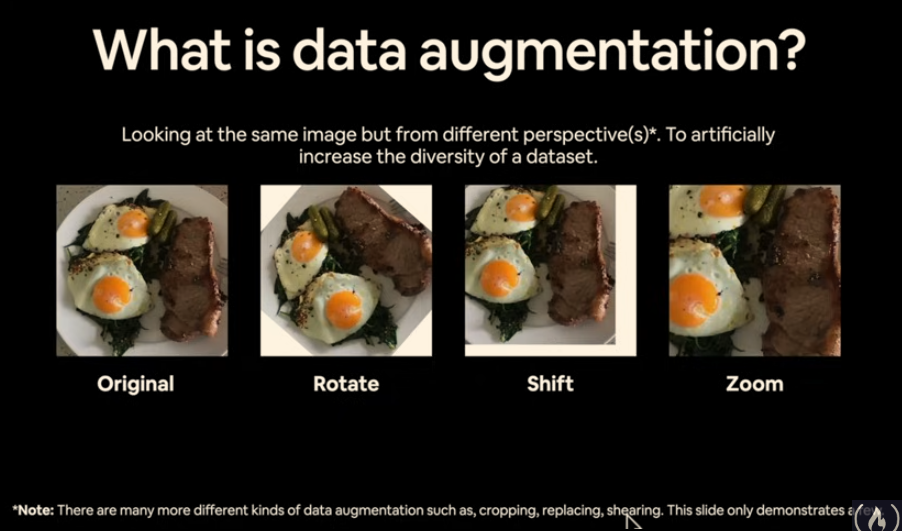

learn more - https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py

In [46]:
# let's look at trivial augment

from torchvision import transforms 

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [47]:
# get all image paths 
image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

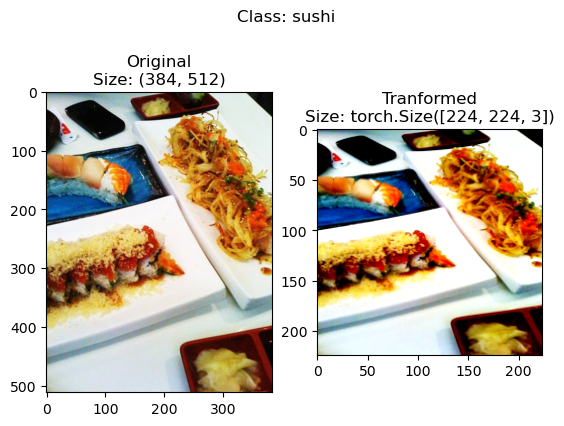

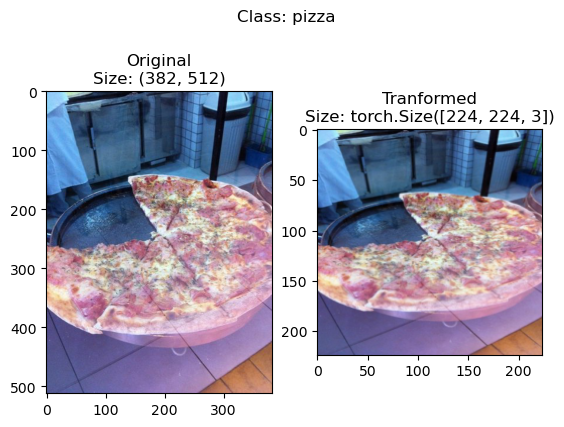

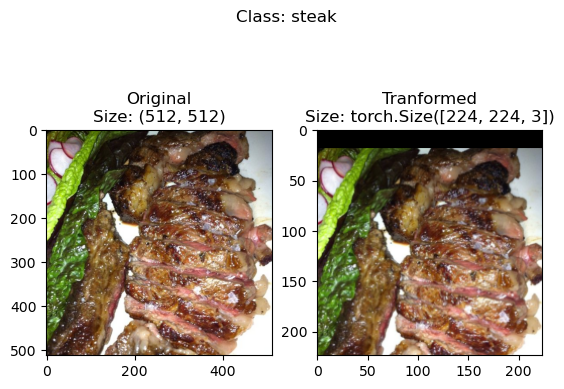

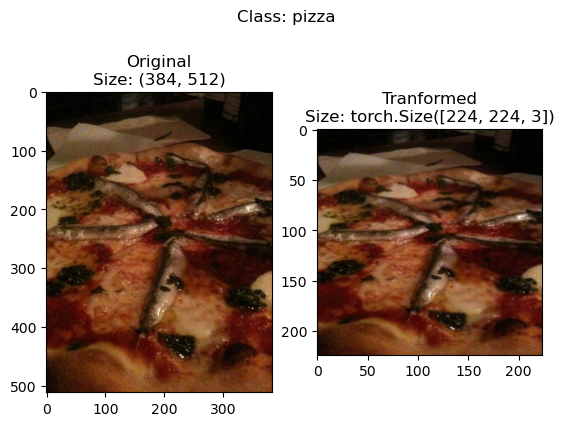

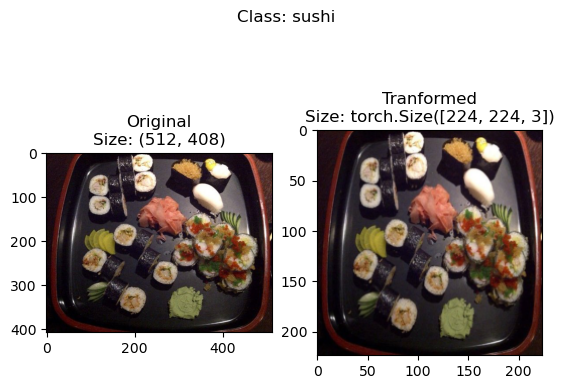

In [48]:
# plot random transformed images
plot_transformed_images(image_paths=image_path_list, transform=train_transform, n=5)

## 7. Model 0: TinyVGG without data augmentation

In [49]:
training_dir, testing_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [50]:
# create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [51]:
# 1. load and transform data 
from torchvision import datasets 
train_data_simple = datasets.ImageFolder(root=training_dir, 
                                            transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=testing_dir, 
                                        transform=simple_transform)

# 2. turn the datasets into dataloaders
import os 
from torch.utils.data import DataLoader

# setup batch size and number of works
BATCH_SIZE = 32 
NUM_WORKERS = os.cpu_count()

# create dataloader 
train_dataloader_simple = DataLoader(dataset=train_data_simple, 
                                    batch_size=BATCH_SIZE)
test_dataloader_simple = DataLoader(dataset=test_data_simple, 
                                    batch_size=BATCH_SIZE)

In [52]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int): 
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                        out_channels=hidden_units,
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer_5 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=hidden_units*2*2, out_features=output_shape)
        )
    def forward(self, x):
        z = self.conv_layer_1(x) 
        z = self.conv_layer_2(z)
        z = self.conv_layer_3(z)
        z = self.conv_layer_4(z)
        z = self.conv_layer_5(z)
        z = self.classifier(z) 
        return z

In [88]:
model_0 = TinyVGG(input_shape=3, output_shape=len(training_data.classes), hidden_units=32).to(device)
model_0

TinyVGG(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
 

In [54]:
# setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [89]:
# setup accuracy function 
from torchmetrics import Accuracy 

accuracy_fn = Accuracy(task="multiclass",num_classes=len(training_data.classes)).to(device)

### 7.1 check model specs

In [92]:
from torchinfo import summary # type: ignore

summary(model_0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 32, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 32, 64, 64]          896
│    └─ReLU: 2-2                         [32, 32, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 32, 64, 64]          9,248
│    └─ReLU: 2-4                         [32, 32, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 32, 32, 32]          --
├─Sequential: 1-2                        [32, 32, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 32, 32, 32]          9,248
│    └─ReLU: 2-7                         [32, 32, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 32, 32, 32]          9,248
│    └─ReLU: 2-9                         [32, 32, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 32, 16, 16]          --
├─Seq

## 8. setup training and testing loop

In [57]:
from tqdm.auto import tqdm

c:\Users\bolth\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
# torch.manual_seed(17)
# torch.cuda.manual_seed(17)

# epochs = 10

# for epoch in tqdm(range(epochs)):
#     model_0.train()
#     training_loss, training_accuracy = 0, 0 

#     for batch, (X, y) in enumerate(train_dataloader_simple): 
#         # send data to target devices 
#         X, y = X.to(device), y.to(device)
#         # forward pass 
#         logits = model_0(X)
#         # calculate loss 
#         loss = loss_fn(logits, y)
#         training_loss += loss.item()
#         # calculate accuracy 
#         training_accuracy += accuracy_fn(torch.softmax(logits, dim=1).argmax(dim=1), y)
#         # optim zero grad 
#         optimizer.zero_grad()
#         # backprop 
#         loss.backward()
#         # gradient descent 
#         optimizer.step()

#         if batch % 4 == 0: 
#             print(f"looked at {BATCH_SIZE * batch}/{len(training_data)}")
#     # calculate loss and accuracy avg 
#     training_loss /= len(train_dataloader_simple)
#     training_accuracy /= len(train_dataloader_simple)

#     testing_loss, testing_accuracy = 0, 0 

#     model_0.eval()
#     with torch.inference_mode():
#         for X, y in test_dataloader_simple:
#             # send data to target device 
#             X, y = X.to(device), y.to(device)
#             # pass forward 
#             test_logits = model_0(X) 
#             # calculate loss and accuracy 
#             testing_loss += loss_fn(test_logits, y).item()
#             testing_accuracy += accuracy_fn(torch.softmax(test_logits, dim=1).argmax(dim=1), y)

#         # calculate the avg 
#         testing_loss /= len(test_dataloader_simple)
#         testing_accuracy /= len(test_dataloader_simple)
#     print(f"Epoch: {epoch} | Training loss: {training_loss:.5f}, Training accuracy: {training_accuracy:.2f} | Testing loss: {testing_loss:.5f}, Testing accuracy: {testing_accuracy:.2f}")

In [59]:
def train_step(model: torch.nn.Module, 
                dataset,
                loss_fn: torch.nn,
                optimizer: torch.optim,
                accuracy_fn, 
                device: torch.device = device):
    model.train()
    training_loss, training_accuracy = 0, 0 

    for batch, (X, y) in enumerate(dataset): 
        # send data to target devices 
        X, y = X.to(device), y.to(device)
        # forward pass 
        logits = model_0(X)
        # calculate loss 
        loss = loss_fn(logits, y)
        training_loss += loss.item()
        # calculate accuracy 
        training_accuracy += accuracy_fn(torch.softmax(logits, dim=1).argmax(dim=1), y)
        # optim zero grad 
        optimizer.zero_grad()
        # backprop 
        loss.backward()
        # gradient descent 
        optimizer.step()

        if batch % 4 == 0: 
            print(f"looked at {BATCH_SIZE * batch}/{len(training_data)}")
    
    training_loss /= len(train_dataloader_simple)
    training_accuracy /= len(train_dataloader_simple)

    return training_loss, training_accuracy

In [60]:
def test_step(model: torch.nn.Module, 
                dataset,
                loss_fn: torch.nn,
                accuracy_fn,
                device: torch.device = device):
    testing_loss, testing_accuracy = 0, 0 

    model.eval()
    with torch.inference_mode():
        for X, y in dataset:
            # send data to target device 
            X, y = X.to(device), y.to(device)
            # pass forward 
            test_logits = model_0(X) 
            # calculate loss and accuracy 
            testing_loss += loss_fn(test_logits, y).item()
            testing_accuracy += accuracy_fn(torch.softmax(test_logits, dim=1).argmax(dim=1), y)

        # calculate the avg 
        testing_loss /= len(test_dataloader_simple)
        testing_accuracy /= len(test_dataloader_simple)
    return testing_loss, testing_accuracy

In [61]:
def train(model: torch.nn.Module, 
                train_dataloader: torch.utils.data.DataLoader,
                test_dataloader: torch.utils.data.DataLoader,
                optimizer: torch.optim, 
                num_epoch: int,
                loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
                device: torch.device = device):
        
        epochs = num_epoch

        results = {"train_loss": [], "train_accuracy": [], "test_loss": [], "test_accuracy": []}

        for epoch in tqdm(range(epochs)):
                training_loss, training_accuracy = train_step(model=model, 
                                                                dataset=train_dataloader, 
                                                                optimizer=optimizer, 
                                                                loss_fn=loss_fn,
                                                                accuracy_fn=accuracy_fn,
                                                                device = device)
                testing_loss, testing_accuracy = test_step(model=model, 
                                                                dataset=test_dataloader, 
                                                                loss_fn=loss_fn, 
                                                                accuracy_fn=accuracy_fn, 
                                                                device = device)
                print(f"Epoch: {epoch} | Training loss: {training_loss:.5f}, Training accuracy: {training_accuracy:.2f} | Testing loss: {testing_loss:.5f}, Testing accuracy: {testing_accuracy:.2f}")
                results["train_loss"].append(training_loss)
                results["train_accuracy"].append(training_accuracy.item())
                results["test_loss"].append(testing_loss)
                results["test_accuracy"].append(testing_accuracy.item())
        
        return results

In [93]:
from timeit import default_timer as timer 

# start the timer 
start_time = timer()

# train model_0
model_0_results = train(model=model_0, train_dataloader=train_dataloader_simple, test_dataloader=test_dataloader_simple, optimizer=optimizer, num_epoch=10, loss_fn=loss_fn, device=device)

# end the timer
end_time = timer()
print(f"total training time: {end_time-start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

looked at 0/225
looked at 64/225


 10%|█         | 1/10 [00:01<00:10,  1.13s/it]

Epoch: 0 | Training loss: 1.10688, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 20%|██        | 2/10 [00:02<00:08,  1.03s/it]

Epoch: 1 | Training loss: 1.10585, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 30%|███       | 3/10 [00:03<00:07,  1.03s/it]

Epoch: 2 | Training loss: 1.10990, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 40%|████      | 4/10 [00:04<00:06,  1.04s/it]

Epoch: 3 | Training loss: 1.10507, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 50%|█████     | 5/10 [00:05<00:05,  1.05s/it]

Epoch: 4 | Training loss: 1.10965, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 60%|██████    | 6/10 [00:06<00:04,  1.08s/it]

Epoch: 5 | Training loss: 1.10894, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 70%|███████   | 7/10 [00:07<00:03,  1.10s/it]

Epoch: 6 | Training loss: 1.11024, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 80%|████████  | 8/10 [00:08<00:02,  1.08s/it]

Epoch: 7 | Training loss: 1.10937, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


 90%|█████████ | 9/10 [00:09<00:01,  1.07s/it]

Epoch: 8 | Training loss: 1.10748, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
looked at 0/225
looked at 64/225


100%|██████████| 10/10 [00:10<00:00,  1.07s/it]

Epoch: 9 | Training loss: 1.10811, Training accuracy: 0.29 | Testing loss: 1.12433, Testing accuracy: 0.20
total training time: 10.679


### 8.1 plot the loss curves of model_0

A **loss curves** is a way of tracking the model progress overtime.

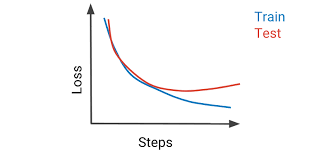

In [63]:
# get the model_0_results keys 
model_0_results.keys()

dict_keys(['train_loss', 'train_accuracy', 'test_loss', 'test_accuracy'])

In [64]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ 
    plots training curves of a results dictionary.
    """
    # get the loss values
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]

    # get the accuracy values
    train_accuracy = results["train_accuracy"]
    test_accuracy = results["test_accuracy"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # plot the loss 
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy") 
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [65]:
model_0_results["train_loss"]

[1.0960216224193573,
 1.0934605151414871,
 1.098050817847252,
 1.0990921556949615,
 1.0953569263219833]

In [66]:
model_0_results

{'train_loss': [1.0960216224193573,
  1.0934605151414871,
  1.098050817847252,
  1.0990921556949615,
  1.0953569263219833],
 'train_accuracy': [0.41015625, 0.40625, 0.375, 0.37109375, 0.41796875],
 'test_loss': [1.0882316827774048,
  1.088031570116679,
  1.08784814675649,
  1.0876339673995972,
  1.0874077081680298],
 'test_accuracy': [0.5416666865348816,
  0.5416666865348816,
  0.5416666865348816,
  0.5416666865348816,
  0.5416666865348816]}

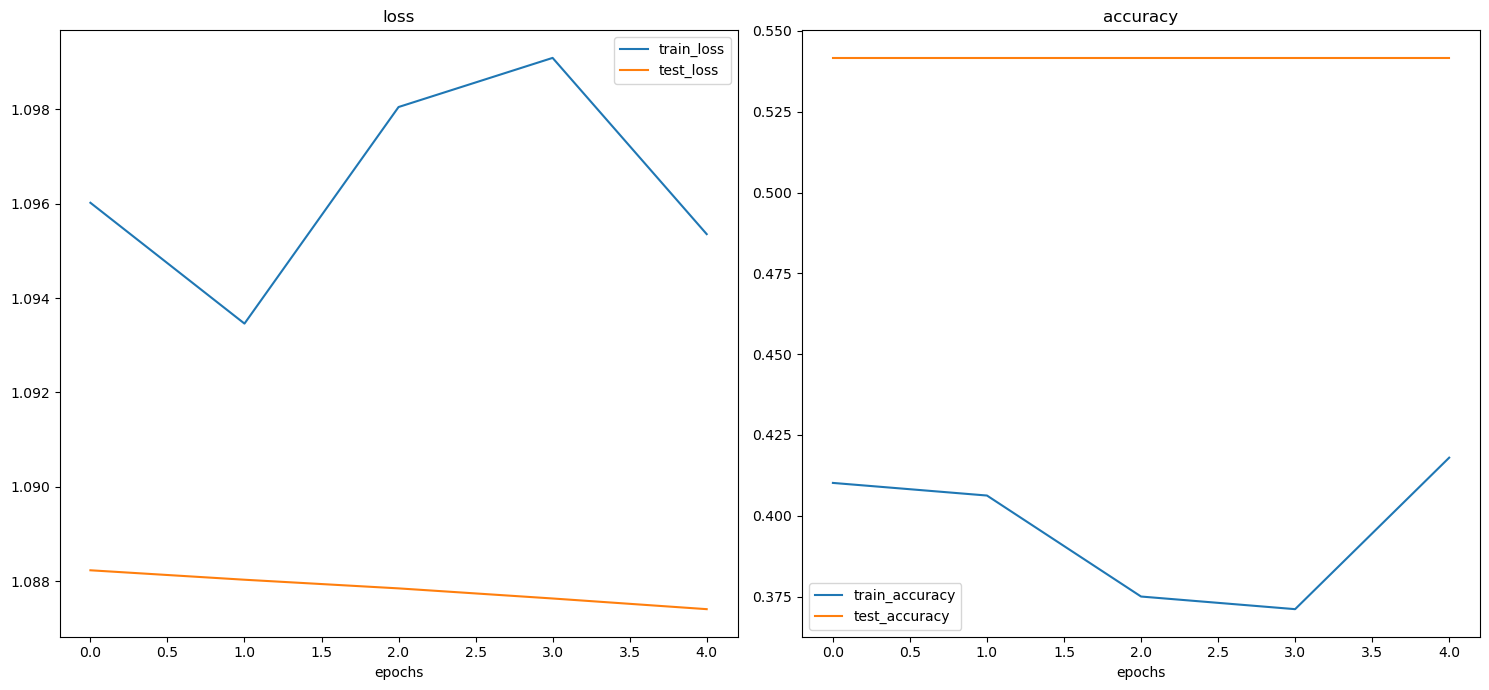

In [67]:
plot_loss_curves(results=model_0_results)

## 9. Model_1: TinyVGG with Data Augmentation

In [68]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [69]:
BATCH_SIZE = 16

train_data_trivial = datasets.ImageFolder(root=training_dir, transform=train_transform_trivial)
test_data_trivial = datasets.ImageFolder(root=testing_dir, transform=test_transform_trivial)

train_dataloader_trivial = DataLoader(dataset=train_data_trivial, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader_trivial = DataLoader(dataset=test_data_trivial, batch_size=BATCH_SIZE, shuffle=False)

In [70]:
model_1 = TinyVGG(input_shape=3, output_shape=len(training_data.classes), hidden_units=32).to(device)
model_1

TinyVGG(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
 

In [71]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

In [72]:
summary(model_1, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 32, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 32, 64, 64]          896
│    └─ReLU: 2-2                         [32, 32, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 32, 64, 64]          9,248
│    └─ReLU: 2-4                         [32, 32, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 32, 32, 32]          --
├─Sequential: 1-2                        [32, 32, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 32, 32, 32]          9,248
│    └─ReLU: 2-7                         [32, 32, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 32, 32, 32]          9,248
│    └─ReLU: 2-9                         [32, 32, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 32, 16, 16]          --
├─Seq

In [73]:
from timeit import default_timer as timer 

# start the timer 
start_time = timer()

# train model_0
model_1_results = train(model=model_1, train_dataloader=train_dataloader_trivial, test_dataloader=test_dataloader_trivial, optimizer=optimizer, num_epoch=10, loss_fn=loss_fn, device=device)

# end the timer
end_time = timer()
print(f"total training time: {end_time-start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 10%|█         | 1/10 [00:01<00:11,  1.29s/it]

Epoch: 0 | Training loss: 2.05939, Training accuracy: 0.68 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 20%|██        | 2/10 [00:02<00:10,  1.34s/it]

Epoch: 1 | Training loss: 2.06263, Training accuracy: 0.56 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 30%|███       | 3/10 [00:03<00:08,  1.23s/it]

Epoch: 2 | Training loss: 2.05939, Training accuracy: 0.68 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 40%|████      | 4/10 [00:05<00:07,  1.29s/it]

Epoch: 3 | Training loss: 2.06263, Training accuracy: 0.56 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 50%|█████     | 5/10 [00:06<00:06,  1.34s/it]

Epoch: 4 | Training loss: 2.07346, Training accuracy: 0.56 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 60%|██████    | 6/10 [00:07<00:05,  1.27s/it]

Epoch: 5 | Training loss: 2.07346, Training accuracy: 0.56 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 70%|███████   | 7/10 [00:08<00:03,  1.23s/it]

Epoch: 6 | Training loss: 2.07346, Training accuracy: 0.56 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 80%|████████  | 8/10 [00:10<00:02,  1.22s/it]

Epoch: 7 | Training loss: 2.07346, Training accuracy: 0.56 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


 90%|█████████ | 9/10 [00:11<00:01,  1.20s/it]

Epoch: 8 | Training loss: 2.05939, Training accuracy: 0.68 | Testing loss: 1.82460, Testing accuracy: 0.75
looked at 0/225
looked at 64/225
looked at 128/225
looked at 192/225


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]

Epoch: 9 | Training loss: 2.05939, Training accuracy: 0.68 | Testing loss: 1.82460, Testing accuracy: 0.75
total training time: 12.335


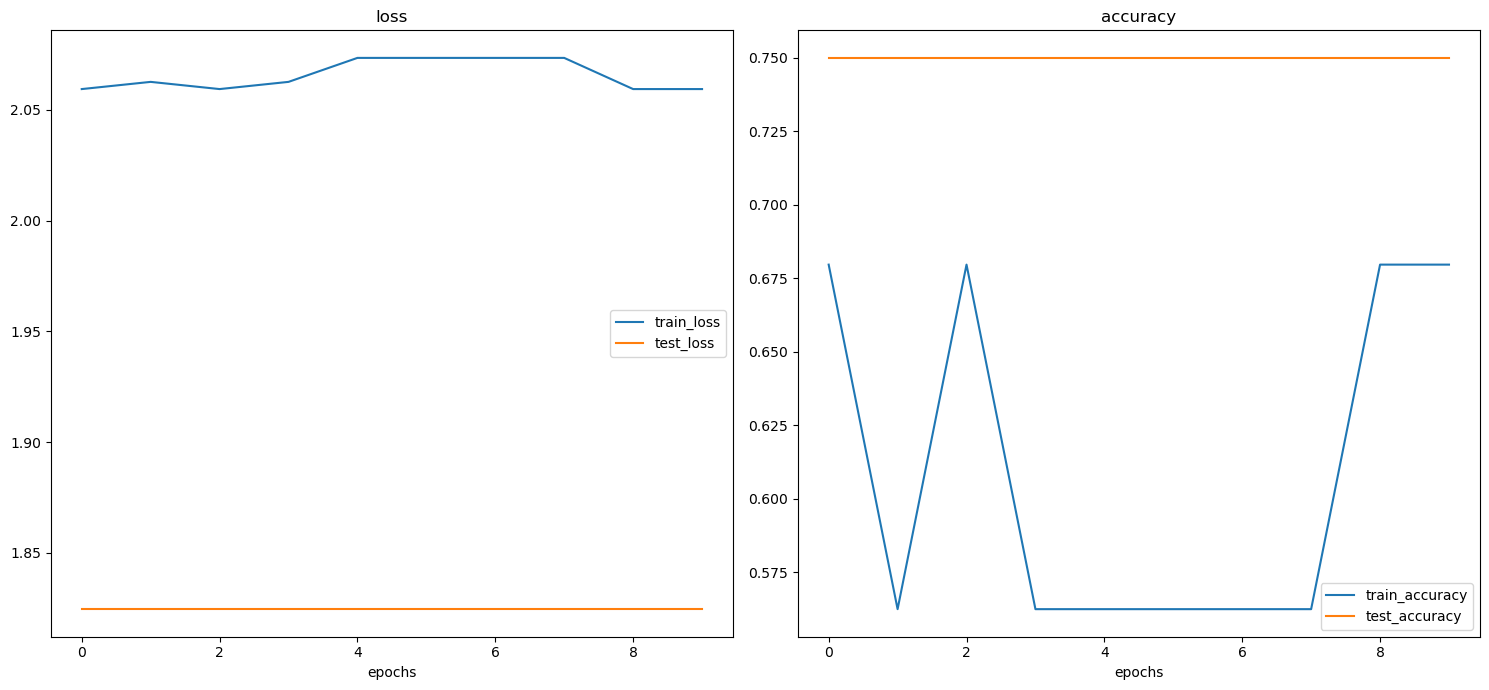

In [74]:
plot_loss_curves(results=model_1_results)

In [99]:
import pandas as pd 

model_1_df = pd.DataFrame(model_1_results)
model_0_df = pd.DataFrame(model_0_results)
model_0_df

train_loss  train_accuracy  test_loss  test_accuracy
0    1.106877        0.292969   1.124328       0.197917
1    1.105848        0.292969   1.124328       0.197917
2    1.109897        0.292969   1.124328       0.197917
3    1.105069        0.292969   1.124328       0.197917
4    1.109651        0.292969   1.124328       0.197917
5    1.108943        0.292969   1.124328       0.197917
6    1.110237        0.292969   1.124328       0.197917
7    1.109373        0.292969   1.124328       0.197917
8    1.107480        0.292969   1.124328       0.197917
9    1.108109        0.292969   1.124328       0.197917

In [76]:
class_names

['pizza', 'steak', 'sushi']

In [77]:
len(test_data_trivial)

75

In [80]:
epochs = range(len(model_0_results))

torch.Size([3, 64, 64])


tensor([0.3421, 0.3213, 0.3366], device='cuda:0', grad_fn=<SelectBackward0>)

In [83]:
model_1_results

{'train_loss': [2.0593863427639008,
  2.0626337975263596,
  2.0593864172697067,
  2.0626338124275208,
  2.0734606087207794,
  2.0734606087207794,
  2.0734607875347137,
  2.073460727930069,
  2.059386298060417,
  2.059386447072029],
 'train_accuracy': [0.6796875,
  0.5625,
  0.6796875,
  0.5625,
  0.5625,
  0.5625,
  0.5625,
  0.5625,
  0.6796875,
  0.6796875],
 'test_loss': [1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342,
  1.8245997826258342],
 'test_accuracy': [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]}

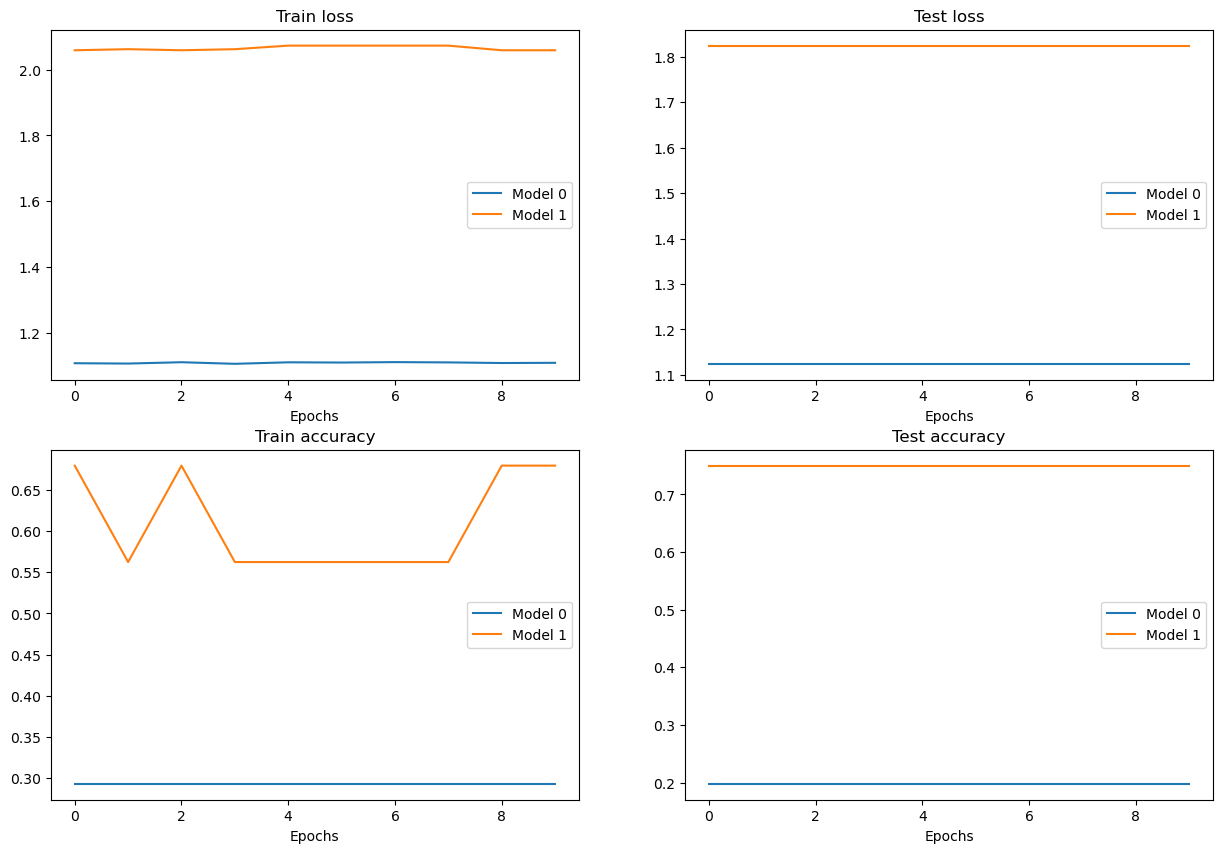

In [100]:
plt.figure(figsize=(15, 10))
epochs = range(len(model_0_df))

nrows = 2 
ncols = 2

# plot train loss 
plt.subplot(nrows, ncols, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# plot the test loss
plt.subplot(nrows, ncols, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

# plot the train accuracy 
plt.subplot(nrows, ncols, 3)
plt.plot(epochs, model_0_df["train_accuracy"], label="Model 0")
plt.plot(epochs, model_1_df["train_accuracy"], label="Model 1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.legend()

#plot the test accuracy 
plt.subplot(nrows, ncols, 4)
plt.plot(epochs, model_0_df["test_accuracy"], label="Model 0")
plt.plot(epochs, model_1_df["test_accuracy"], label="Model 1")
plt.title("Test accuracy")
plt.xlabel("Epochs")
plt.legend()

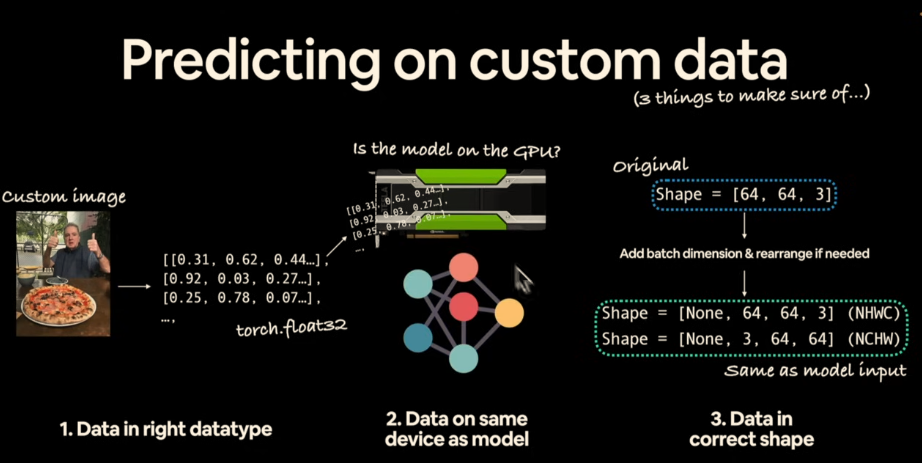